# The Sparks Foundation: Data science and Business Analytics Tasks

<img src="https://internship.thesparksfoundation.info/assests/img/logo.png"  width="300" height="300">

## Task1 : Predicition using Supervised ML

## Author Batool Hammoud

### Importing required libraries

In [437]:
#importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### importing and reading the dataset

In [438]:
#importing and reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### dataset overview

In [439]:
#size of dataset
df.shape

(25, 2)

In [440]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Making sure the dataset is clean and ready to be analyzed

In [441]:
#checking if dataset has any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [442]:
#checking if dataset has any duplicated values
df.duplicated().sum()

0

### Visualizing the data

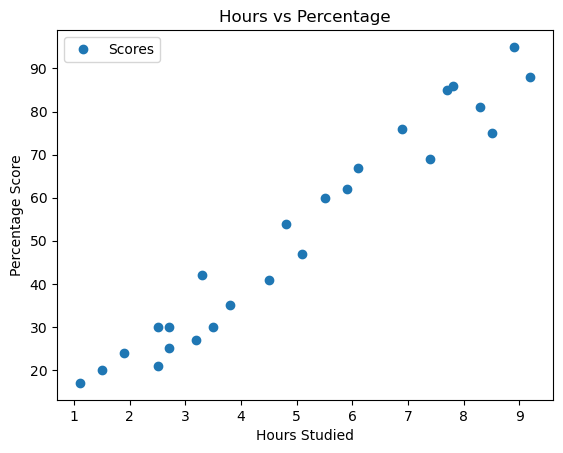

In [443]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**This graph above, shows a positive linear relation between the number of hours studied and percentage of score.**

Text(0.5, 1.0, 'Hours Distribution')

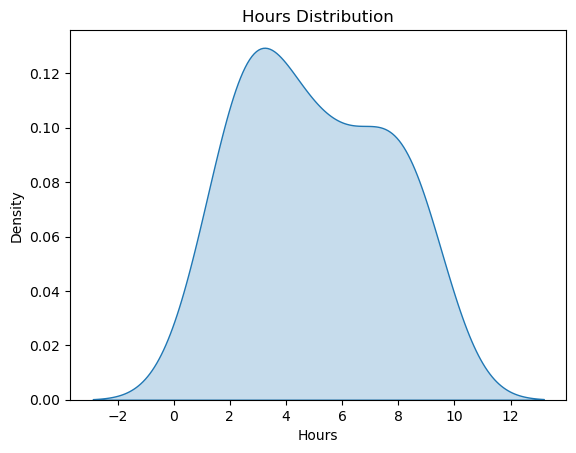

In [444]:
sns.kdeplot(data = df , x = df['Hours'] , fill = True)
plt.title('Hours Distribution')

### Finding outliers

<AxesSubplot:>

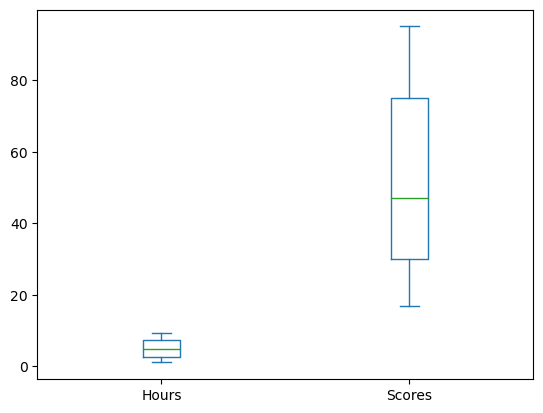

In [445]:
df.plot(kind= 'box')

### Preparing the data

In [446]:
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores']).reshape(-1,1)

### Splitting the data

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the algorithm

In [448]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print("Training complete.")

Training complete.


### Best line fits the dataset
#### The linear regression equation:

**yi = βxi + α + εi**
where y_i is the score i based on the study time spent, x_i is the number of
studying hours, β is (regr.coef_), α is (regr.intercept_), and ε_i is a (hopefully small) the error term representing the fact that there are other factors not accounted for by this simple model.
**Data Science from Scratch
by Joel Grus**

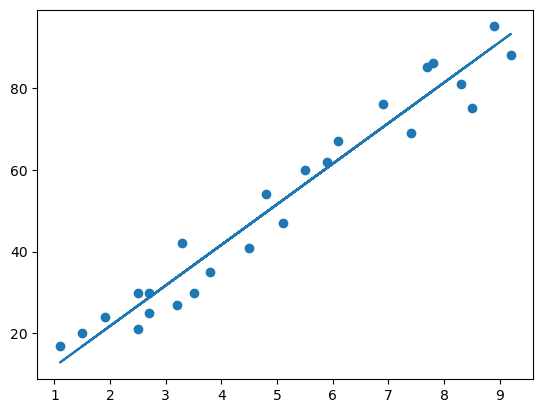

In [449]:
# Plotting the regression line
line = regr.coef_*X + regr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

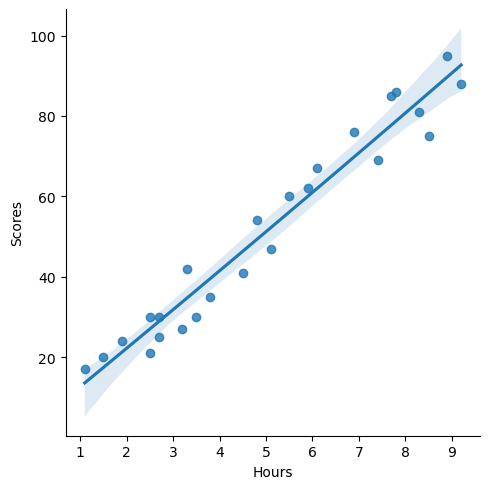

In [450]:
#plotting the line using seaborn library
sns.lmplot(x="Hours", y="Scores", data= df, order=2)
plt.show()

## Predications

In [451]:
#y_train_prd = regr.predict(X_train )
print(*X_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

[1.5] [3.2] [7.4] [2.5] [5.9]


In [452]:
print(*y_train_pred)

[39.67865467] [20.84840735] [79.32128059] [70.40168976] [12.91988217] [52.56250809] [78.33021494] [34.72332643] [84.27660883] [93.19619966] [62.47316457] [36.70545772] [28.77693254] [56.52677068] [28.77693254] [86.25874013] [26.79480124] [49.58931115] [90.22300272] [46.6161142]


In [453]:
print(*y_test_pred)

[16.88414476] [33.73226078] [75.357018] [26.79480124] [60.49103328]


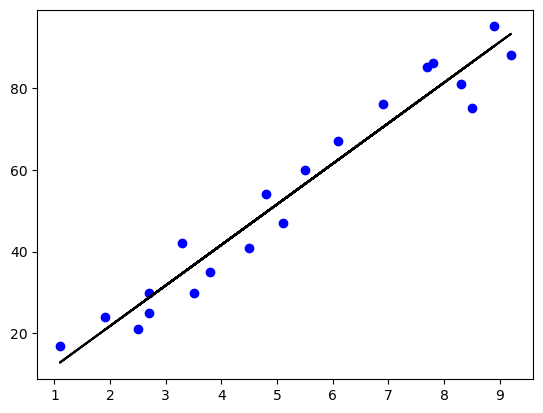

In [454]:
y_train_pred = regr.predict(X_train)
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, y_train_pred, color='k')
plt.show()

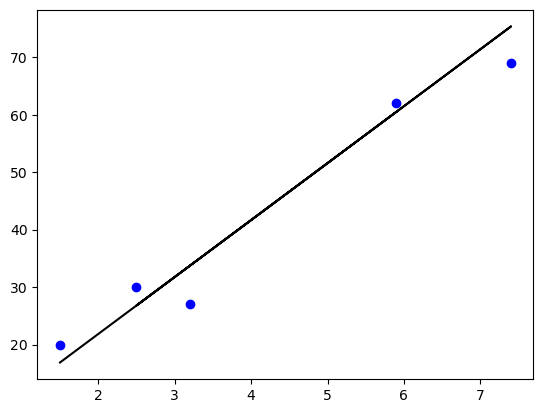

In [455]:
y_test_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, y_test_pred, color='k')
plt.show()

In [456]:
# Comparing Actual vs Predicted
ytest = [item[0] for item in y_test]
ypred = [item[0] for item in y_pred]
df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluation

In [457]:
from sklearn import metrics  
from sklearn.metrics import mean_squared_error , r2_score
print('Training Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 


Training Mean Absolute Error: 4.183859899002975


In [458]:
#Train error
print('Training Mean Squared Error:', 
      mean_squared_error(y_true = y_train , y_pred = y_train_prd , squared = False))

Training Mean Squared Error: 5.558613350226342


In [459]:
#Model train score
print('Training R2 Score:', 
      r2_score(y_true = y_train , y_pred = y_train_prd))

Training R2 Score: 0.9515510725211552


In [460]:
#Test error
print('Testing Mean Squared Error:', 
      mean_squared_error(y_true = y_test , y_pred = y_test_prd , squared = False))

Testing Mean Squared Error: 4.6474476121003665


In [461]:
print('Testing R2 Score:', 
      r2_score(y_true = y_test , y_pred = y_test_prd))

Testing R2 Score: 0.9454906892105356


## What will be the predicted score when a student studies 9.25 hrs/ day?

In [462]:
print(*regr.predict([[9.25]])[0])

93.69173248737538


In [463]:
print(f'Student score will be : ',regr.predict([[9.25]])[0])

Student score will be :  [93.69173249]
